# Description

This gallery notebook is used to verify that `amp/core/plotting` functions display plots correctly.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Imports

In [67]:
import logging

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import core.plotting.visual_stationarity_test as cpvistte
import core.plotting.misc_plotting as cpmiscplt

import helpers.hdbg as hdbg
import helpers.henv as henv
import helpers.hprint as hprint

# Configure Logger

In [3]:
hdbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

_LOG.info("%s", henv.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/.local/share/jupyter/runtime/kernel-6f2771e1-75d2-40fa-8ade-01c90236a3ee.json'
-----------------------------------------------------------------------------
This code is not in sync with the container:
code_version='1.4.3' != container_version='1.4.0'
-----------------------------------------------------------------------------
You need to:
- merge origin/master into your branch with `invoke git_merge_master`
- pull the latest container with `invoke docker_pull`
INFO  # Git
  branch_name='SorrTask355_unit_test_tee-param_for_hsystem_system'
  hash='8d0edab6d'
  # Last commits:
    * 8d0edab6d Dylan-Celli updating tests according to comments and running linter           (  19 hours ago) Wed Jul 12 18:14:22 2023  (HEAD -> SorrTask355_unit_test_tee-param_for_hsystem_system, origin/SorrTask355_unit_test_tee-param_for_hsystem_system)
    * bf4b708ea Dylan-Celli updating to add file output checks in test 9 and 10; c

# Plots

## `plot_histograms_and_lagged_scatterplot()`

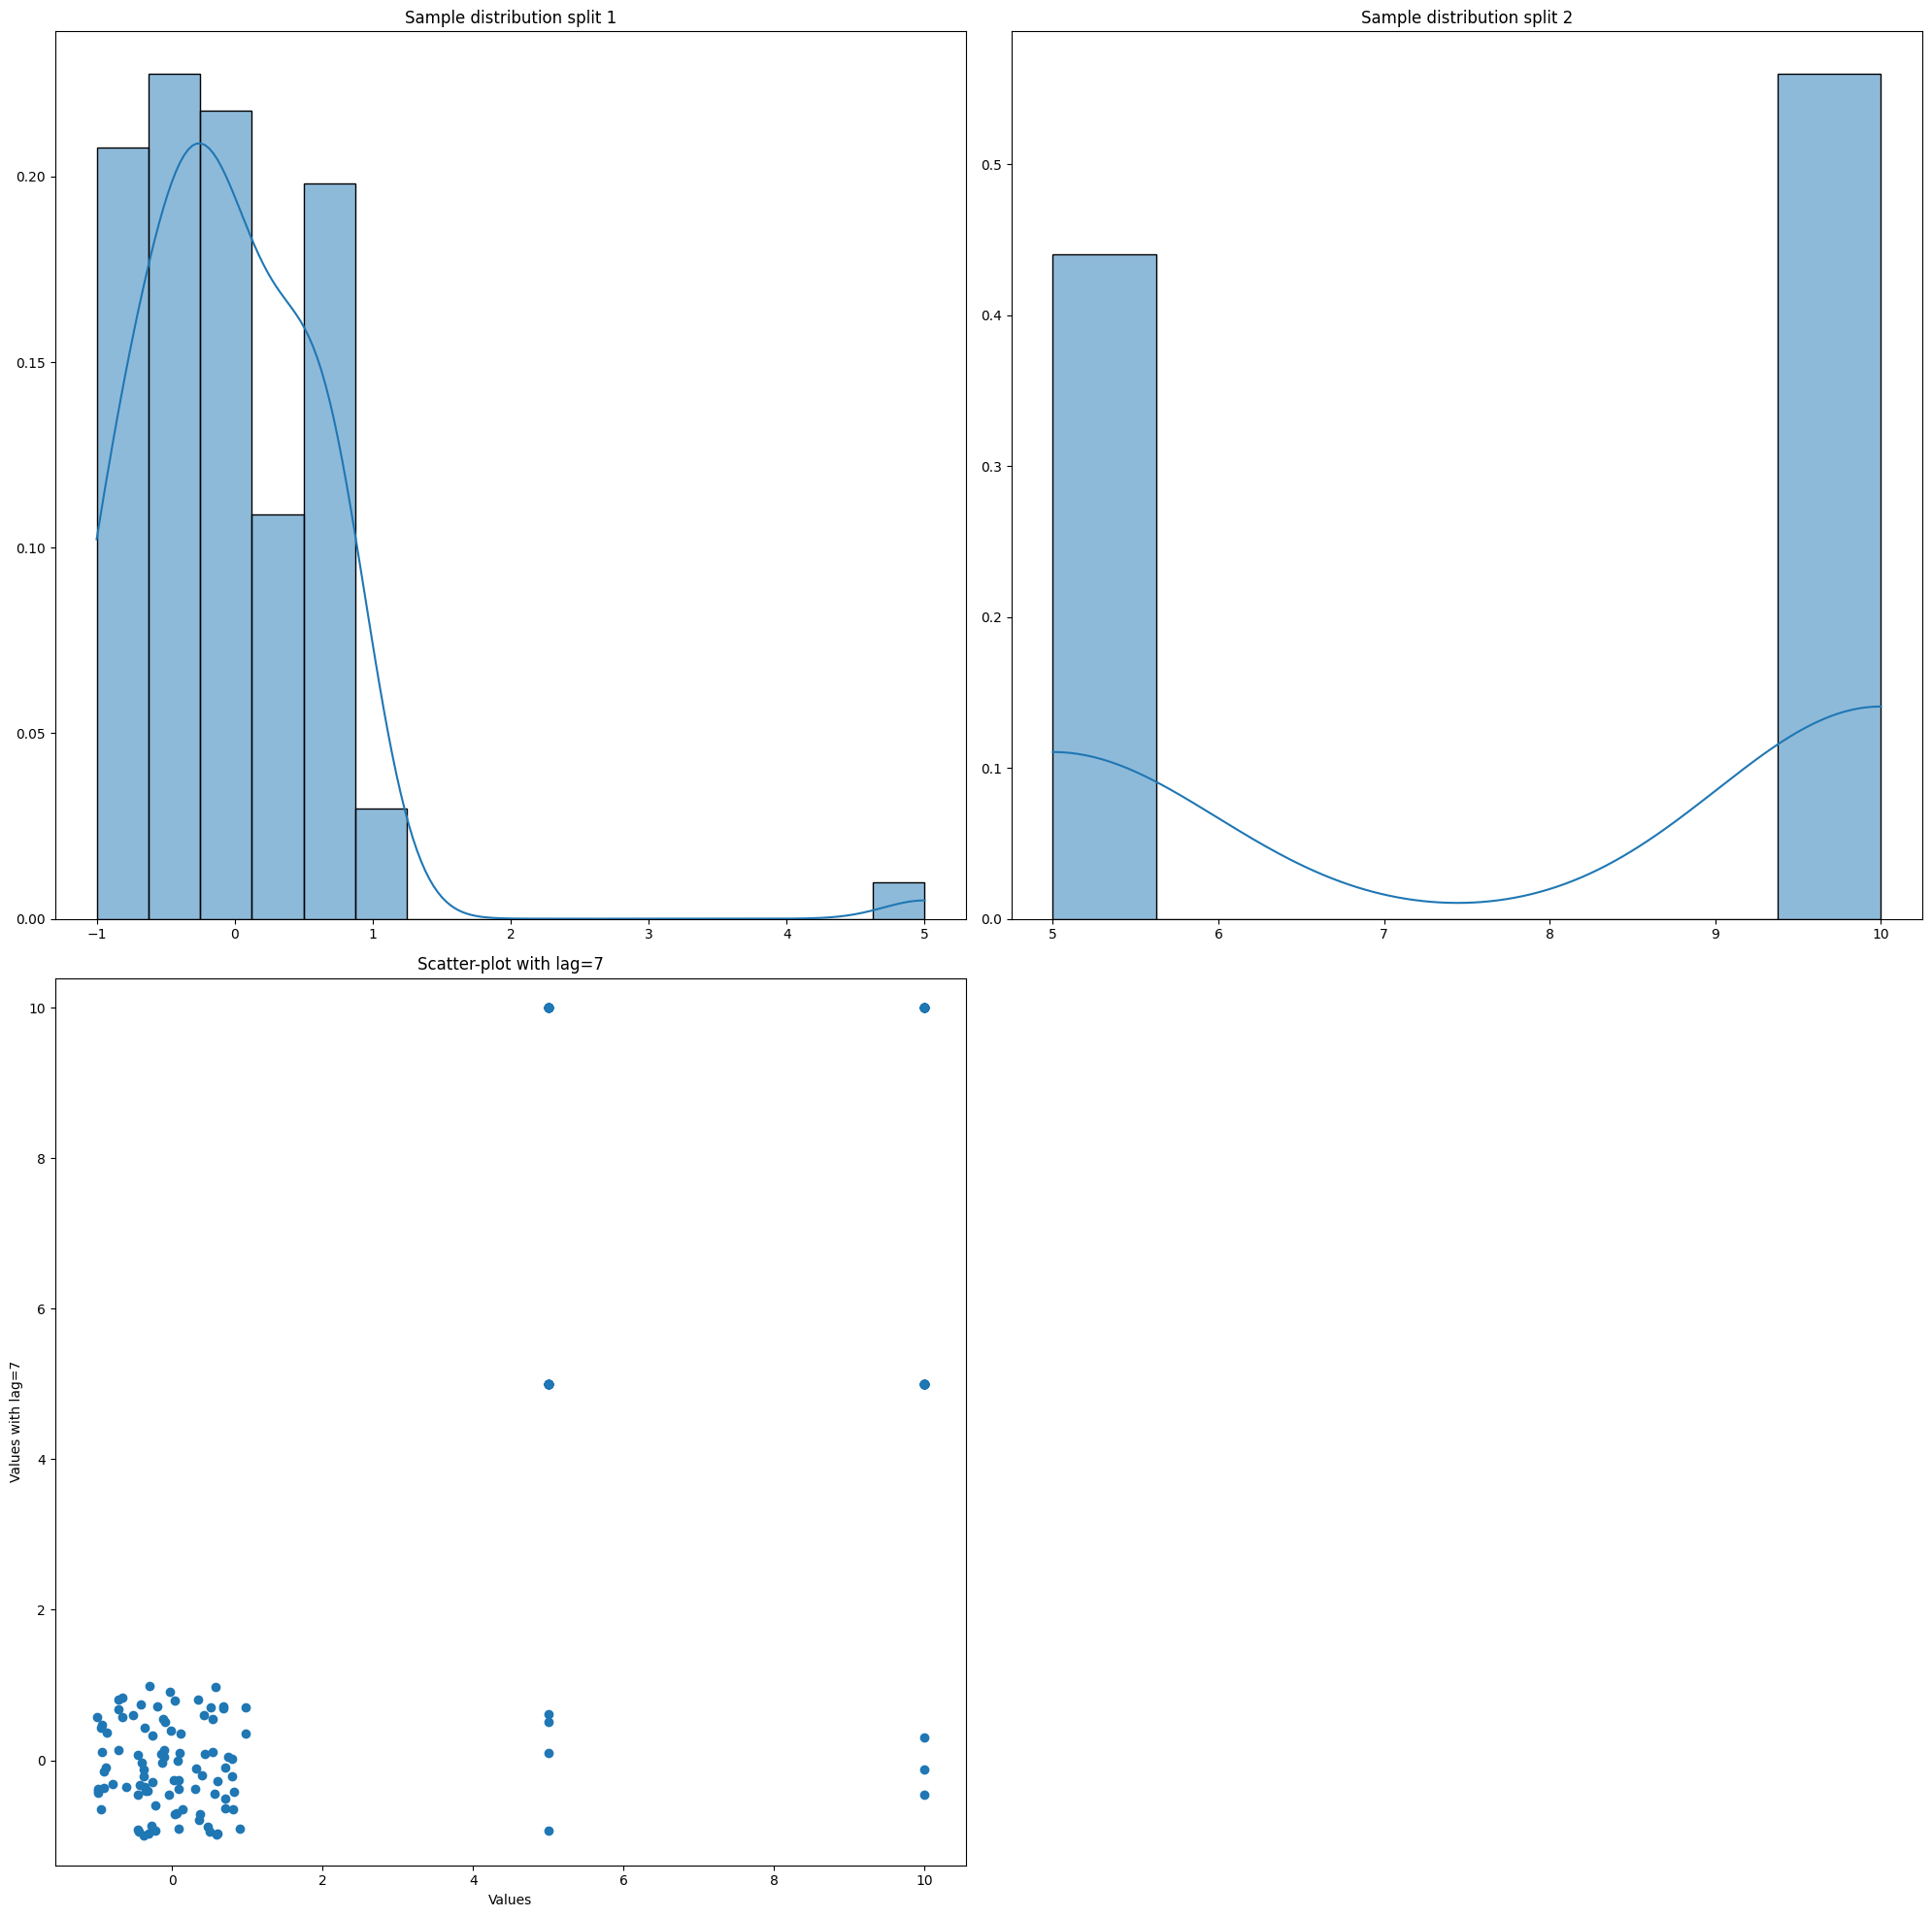

In [11]:
# Set inputs.
seq = np.concatenate([np.random.uniform(-1, 1, 100), np.random.choice([5, 10], 100)])
index = pd.date_range(start="2023-01-01", periods=len(seq), freq="D")
srs = pd.Series(seq, index=index)
lag = 7
# TODO(Dan): Remove after integration with `cmamp`
figsize = (20,20)
# Plot.
cpvistte.plot_histograms_and_lagged_scatterplot(srs, lag, figsize=figsize)

## `plot_projection()`

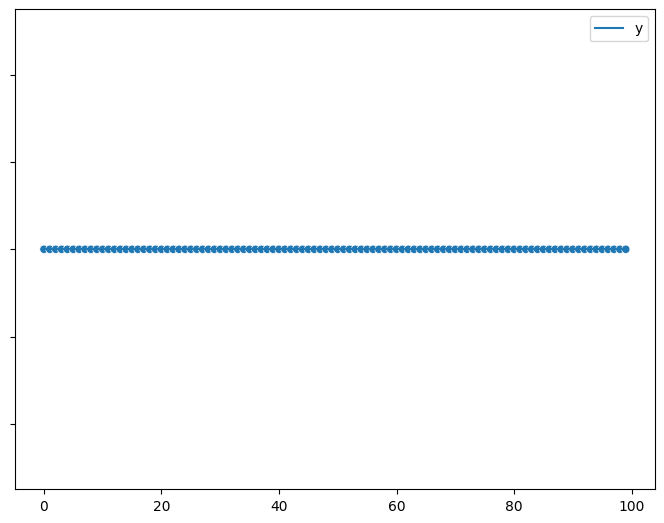

In [79]:
rand_df = pd.DataFrame(np.random.randint(0,100,size=(100, 1)), columns=['y'])
#fig, ax = plt.subplots()
#ax.plot(range(0, 100), range(0, 100))
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
cpmiscplt.plot_projection(rand_df, special_values = [1000], mode = "scatter", ax = ax)